This is just the coding without any explanations, a brute force method:

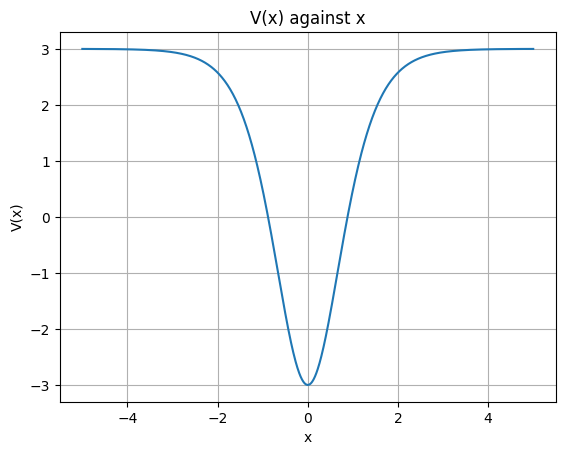

E_min = -3.0 E_max = 2.998910500614337
Actual eigenvalue,E is [-1.5  1.   2.5]
Iterated eigenvalue,E is [-1.5  1.   2.5]


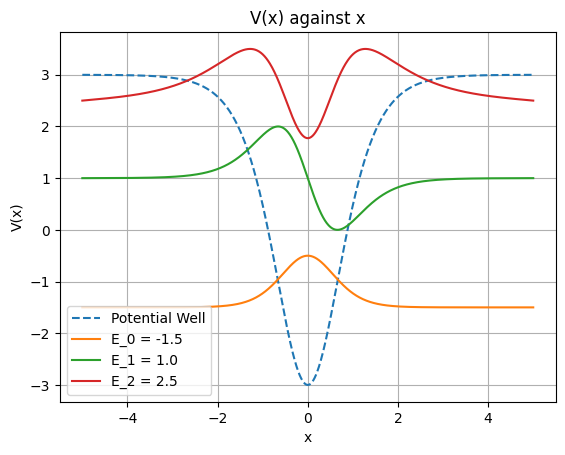

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

#define g(x), and V(x)
def g(i,E):
    return (2*m/hbar**2)*(V(x[i])-E)
def V(x):
    return (hbar**2/2*m)*a**2*lam*(lam-1)*(1/2 - 1/(np.cosh(a*x))**2)

#deifne natural units
hbar=m=a=1
#define lambda
lam=4

#define function for numerov method
def numerov(psi0,psi1,h,g,E,i,n):
    alpha=psi1*(2+(10*h**2/12)*g(i-n,E))
    beta=psi0*(1-(h**2/12)*g(i-1+n,E))
    gamma=1-(h**2/12)*g(i+1-3*n,E)
    return (alpha-beta)/gamma

#set range for x and our step
h=0.01
x=np.arange(-5,5+h,h)
#taking size of x            
n=np.size(x)

#plot V(x) against x
mpl.plot(x,V(x))
mpl.title("V(x) against x")
mpl.ylabel("V(x)")
mpl.xlabel("x")
mpl.grid()
mpl.show()

#initial minimum value and maximum value for E
Einitial=np.min(V(x))
Efinal=np.max(V(x))
print("E_min =",Einitial,"E_max =",Efinal)

#define actual function for E
def E_act(n):
    return hbar**2/2*m * a**2 * ( lam*(lam-1)/2 - (lam-1-n)**2)

#set how many levels we want so the loop only updates for a few loops and not endlessly
n_quantum=3

#set a variable to keep the eigenvalues of E
E_eigen=np.zeros(n_quantum)

#set a variable for actual eigenvalue of E
E_actual=np.zeros(n_quantum)

#set a variable to keep the wavefunction for each eigenvalue
psi_eigen=np.zeros((n,n_quantum))

#start the eigenvalue finding loop
for i in range (0,n_quantum):

    #define the range for E. This is made very outside so the Einitial can be updated once nested-loop finishes.
    E=np.arange(Einitial,Efinal+0.1,0.1)

    #find size of E so the loop for testing E can be limited to the amount of E given in the range.
    N=np.size(E)
    
    #define array to keep L-R solution,psi1 and R-L solution.
    #this is made in the main loop so it completely reset the array to empty array for each test.
    psi1=np.zeros(n//2+2)
    psi2=np.zeros(n//2+2)

    #this is the psi1(in Numerov function) value for L-R integration.
    #It doesn't matter what value we choose since the continuous iteration will try to adjust itself based on this anyway.
    npstart1=1e-5

    #This is the psi1(in Numerov function) value for R-L integration.
    #The nature of wavefunction is that it is antisymmetic when quantum number is uneven, and symmetric when its even.
    #So, as we set our npstart1 constant, our npstart2 must be the same value but with changing sign.
    if i%2==0:
        npstart2=1e-5
    else:
        npstart2=-1e-5

    #This is the loop that will test all value of E within the range of E
    for k in range(0,N):

        #setting boundary for psi1 and psi2, note the index for them are differently put.
        psi1[0]=0
        psi1[1]=npstart1
        psi2[-1]=0
        psi2[-2]=npstart2

        #loop to find all iteration of psi1 for given E[k]
        for j in range(1,(n//2)+1):
            psi1[j+1]=numerov(psi1[j-1],psi1[j],h,g,E[k],j,0)
        
        #loop to find all iteration of psi2 for given E[k]
        #note that the reason why i wanted a switch, is so i can make a loop with this index direction
        for j in range(-1,-(n//2)-1,-1):
            psi2[j-2]=numerov(psi2[j],psi2[j-1],h,g,E[k],j,1)

        #finding the boundary condition value of prime psi(x) divided by psi(x)
        boundary1=(psi1[-1]-psi1[-3])/2*h*psi1[-2]
        boundary2=(psi2[0]-psi2[2])/2*h*psi1[1]

        #check if the boundary difference is below the tolerance value
        if np.abs(boundary1-boundary2)<5e-9:
            
            #keep the value of eigenvalue and its function
            E_eigen[i]=E[k]
            psi_eigen[:,i]=np.concatenate((psi1[:n//2],psi2[1:]))

            #calculate the actual values
            E_actual[i]=E_act(i)

            #break loop to start find the next eigenvalue
            break
    
    #update the value of Einitial in E so next eigenvalue can be found
    Einitial=E[k]+0.1

#printing the actual eigenvalue and iterated eigenvalue
print("Actual eigenvalue,E is",E_actual)
print("Iterated eigenvalue,E is",E_eigen)

#normalizing the eigenfunction
psi_eigennorm=np.copy(psi_eigen)
for i in range(0,n_quantum):
    psi_eigennorm[:,i]=psi_eigen[:,i]/np.max(np.abs(psi_eigen[:,i]))

#plotting the potential well
mpl.plot(x,V(x),label="Potential Well",linestyle="dashed")

#plotting the eigenfunctions with the energy correction
for i in range(0,n_quantum):
    mpl.plot(x,psi_eigennorm[:,i]+E_eigen[i],label=f'E_{i} = {np.round(E_eigen[i],1)}')

mpl.title("V(x) against x")
mpl.ylabel("V(x)")
mpl.xlabel("x")
mpl.legend(loc="lower left")
mpl.grid()
mpl.show()